## NX31 Examproject

## Packages and extensions

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy as sp
from scipy import optimize
from scipy import interpolate
import sympy as sm
from IPython.display import display
import ipywidgets as widgets


%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
sm.init_printing(use_unicode=True)

## Introduction

This examproject is made by our own effort combined, with inspiration from Problem sets, Lecture notebooks and earlier delivered projects. We have also gotten inspiration from Google/Stackoverflow searches. 

# Human capital accumulation

Consider a worker living in **two periods**, $t \in \{1,2\}$. 

In each period she decides whether to **work ($l_t = 1$) or not ($l_t = 0$)**. 

She can *not* borrow or save and thus **consumes all of her income** in each period. 

If she **works** her **consumption** becomes:

$$c_t = w h_t l_t\,\,\text{if}\,\,l_t=1$$

where $w$ is **the wage rate** and $h_t$ is her **human capital**. 

If she does **not work** her consumption becomes:

$$c_t = b\,\,\text{if}\,\,l_t=0$$

where $b$ is the **unemployment benefits**.

Her **utility of consumption** is: 

$$ \frac{c_t^{1-\rho}}{1-\rho} $$

Her **disutility of working** is:

$$ \gamma l_t $$

From period 1 to period 2, she **accumulates human capital** according to:

$$ h_2 = h_1 + l_1 + 
\begin{cases}
0 & \text{with prob. }0.5 \\
\Delta & \text{with prob. }0.5 
\end{cases} \\
$$

where $\Delta$ is a **stochastic experience gain**.

In the **second period** the worker thus solves:

$$
\begin{eqnarray*}
v_{2}(h_{2}) & = &\max_{l_{2}} \frac{c_2^{1-\rho}}{1-\rho} - \gamma l_2
\\ & \text{s.t.} & \\
c_{2}& = & w h_2 l_2 \\
l_{2}& \in &\{0,1\}
\\ & \text{ NEW - s.t.} & \\
c_{2}& = & \begin{cases}
w h_2 & 
\text{if }l_2 = 1  \\
b & \text{if }l_2 = 0 
\end{cases} \\
\end{eqnarray*}
$$

In the **first period** the worker thus solves:

$$
\begin{eqnarray*}
v_{1}(h_{1}) &=& \max_{l_{1}} \frac{c_1^{1-\rho}}{1-\rho} - \gamma l_1 + \beta\mathbb{E}_{1}\left[v_2(h_2)\right]
\\ & \text{s.t.} & \\
c_1 &=& w h_1 l_1 \\
h_2 &=& h_1 + l_1 + \begin{cases}
0 & \text{with prob. }0.5\\
\Delta & \text{with prob. }0.5 
\end{cases}\\
l_{1} &\in& \{0,1\}\\
\end{eqnarray*}
$$

where $\beta$ is the **discount factor** and $\mathbb{E}_{1}\left[v_2(h_2)\right]$ is the **expected value of living in period two**.

The **parameters** of the model are:

In [3]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

The **relevant levels of human capital** are:

In [4]:
h_vec = np.linspace(0.1,1.5,100)

**Question 1:** Solve the model in period 2 and illustrate the solution (including labor supply as a function of human capital). 

**Question 2:** Solve the model in period 1 and illustrate the solution (including labor supply as a function of human capital). 

**Question 3:** Will the worker never work if her potential wage income is lower than the unemployment benefits she can get? Explain and illustrate why or why not.

## **Answer 1**: Human capital accumulation

For the three question concerning Human capital accumulation have taking a lot of inspiration from Problem set 7.4.

Solving the model in period 2 and illustrating labor supply as a function of human capital.

First we set up the functions of the model, both for period one and period two.

In [5]:
def utility(c,rho):
    return c**(1 - rho)/(1 - rho) #CHANGED

def c(w,h,l,b):
    return w*h*l + b*(1 - l) #CHANGED

def bequest(l,gamma):
    return gamma*l

def v2(w,h2,l2,b,rho,gamma):
    return utility(c(w,h2,l2,b),rho) - bequest(l2,gamma)

def v1(h1,l1,v2_interp,Delta,w,b,rho,gamma,beta):
    
    # a. v2 value, if no accumulation of humancapital
    h2_No = h1 + l1 + 0
    v2_No = v2_interp([h2_No])[0]
    
    # b. v2 value, if accumulation of human capital
    h2_Yes = h1 + l1 + Delta
    v2_Yes = v2_interp([h2_Yes])[0]
    
    # c. expected v2 value
    v2 = 0.5*v2_No + 0.5*v2_Yes
    
    # d. total value
    return utility(c(w,h1,l1,b),rho) - bequest(l1,gamma) + beta*v2

We now ready to solve Question 1.1.

### Question 1.1

Next we will define a function to solve the model for period 2.

In [6]:
def solve_period_2(rho,gamma,Delta):
    
    # Vectors
    l2_vec = np.empty(100)
    v2_vec = np.empty(100)
    
    # Solve for each h2
    for i,h2 in enumerate(h_vec):
        
        # To work or not to work #CHANGED
        if v2(w,h2,1,b,rho,gamma) < v2(w,h2,0,b,rho,gamma):
            l2_vec[i] = 0
        else:
            l2_vec[i] = 1
        
        v2_vec[i] = v2(w,h2,l2_vec[i],b,rho,gamma)
        
    return l2_vec, v2_vec

**CHANGED**

Using our vectors for labor supply and utility for each value of human capital(h) in the given vector h_vec, we will solve the model for period 2. We will also illustrate this below.

In [7]:
# Symbols
w = sm.symbols('w')
h_2 = sm.symbols('h_2')
rho = sm.symbols('rho')
gamma = sm.symbols('gamma')
v21 = sm.symbols('v_{2, l=1}')
v20 = sm.symbols('v_{2, l=0}')
b = sm.symbols('b')

Utility when working:


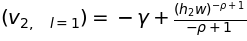

Utility whn not working:


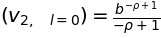

The kink in human capital is then where the two utilities are equal, so we set them equal and isolate h_2:


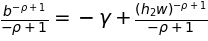

In [8]:
# Solves for optimal h #CHANGED
print(f'Utility when working:')
v_21 = (w*h_2*1)**(1-rho)/(1-rho)-gamma
display(sm.Eq(v21,v_21))
print(f'Utility whn not working:')
v_20 = b**(1-rho)/(1-rho)
display(sm.Eq(v20,v_20))
print(f'The kink in human capital is then where the two utilities are equal, so we set them equal and isolate h_2:')
display(sm.Eq(v_20,v_21))
f = v_21-v_20
fs = sm.solve(f,h_2)
fs

In [17]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
opt_h2 = (b**(-rho + 1) - gamma*rho + gamma)**(-1/(rho - 1))/w
print(f'{opt_h2:.4f}')

0.5556


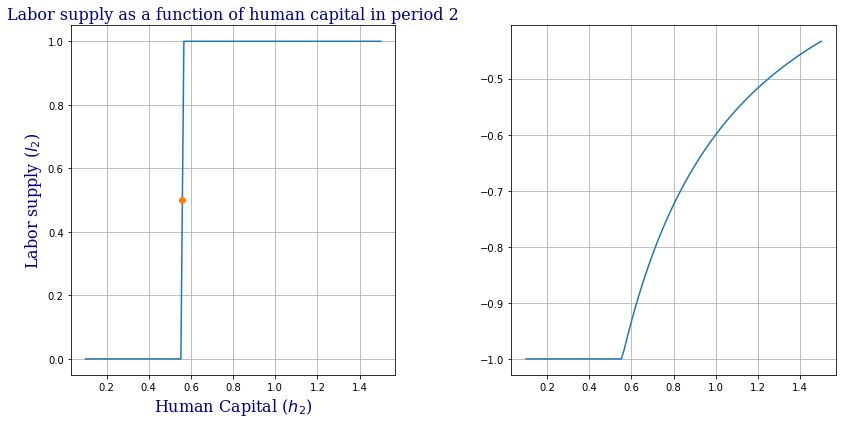

In [10]:
# Solving
l2_vec,v2_vec = solve_period_2(rho,gamma,Delta)

# Figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)
ax.plot(h_vec,l2_vec)
ax1.plot(h_vec,v2_vec)

# Labels
font = {'family':'serif','color':'darkblue','weight':'normal','size': 16,}
ax.set_xlabel('Human Capital ($h_2$)', fontdict=font)
ax.set_ylabel('Labor supply ($l_2$)', fontdict=font)
ax.set_title('Labor supply as a function of human capital in period 2', fontdict=font)
ax.grid()
ax1.grid()
ax.plot(opt_h,0.5,marker='o')
plt.tight_layout()

**CHANGED**

From the figures above, we see that with lower human capital she will tend to not work in period 2. The breakeven between working and not working is 0.5556, marked with a orange dot on the left plot. Thus she will choose to work if h>0.5556. This value is calculated above.

This can also be seen by the kink in the graph. The figure to the left shows when at what human capital level, she will choose to work, whereas the figure on the right shows her total utility evolvement for values in human capital.




### Question 1.2

We will now solve the model for period one.

In [11]:
def solve_period_1(rho,gamma,beta,Delta,v1,v2_interp):
    
    # Vectors
    l1_vec = np.empty(100)
    v1_vec = np.empty(100)
    
    # Solve for each h1
    for i,h1 in enumerate(h_vec):
             
        # To work or not to work
        if v1(h1,1,v2_interp,Delta,w,b,rho,gamma,beta) < v1(h1,0,v2_interp,Delta,w,b,rho,gamma,beta):
            l1_vec[i] = 0
        else:
            l1_vec[i] = 1
        
        v1_vec[i] = v1(h1,l1_vec[i],v2_interp,Delta,w,b,rho,gamma,beta)
        
    return l1_vec, v1_vec

# Construct interpolator
v2_interp = interpolate.RegularGridInterpolator((h_vec,), v2_vec, bounds_error=False, fill_value=None)

In [12]:
# Symbols
w = sm.symbols('w')
h_1 = sm.symbols('h_1')
rho = sm.symbols('rho')
gamma = sm.symbols('gamma')
v11 = sm.symbols('v_{1, l=1}')
v10 = sm.symbols('v_{1, l=0}')
b = sm.symbols('b')
beta = sm.symbols('beta')
v2 = sm.symbols('E{[v_2]}')

Utility when working:


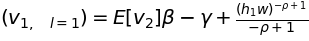

Utility whn not working:


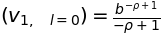

The kink in human capital is then where the two utilities are equal, so we set them equal and isolate h_2:


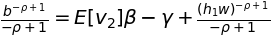

In [13]:
# Solves for the kink point in human capial i period 2
print(f'Utility when working:')
v_11 = (w*h_1*1)**(1-rho)/(1-rho)-gamma+beta*v2
display(sm.Eq(v11,v_11))
print(f'Utility whn not working:')
v_10 = b**(1-rho)/(1-rho)
display(sm.Eq(v10,v_10))
print(f'The kink in human capital is then where the two utilities are equal, so we set them equal and isolate h_2:')
display(sm.Eq(v_10,v_11))
f1 = v_11-v_10
f1s = sm.solve(f1,h_1)
f1s

In [118]:
#Expected v_2
v2 = (w*1.5*1)**(1-rho)/(1-rho)-gamma
print(f'{v2:.5f}')

-0.43333


In [119]:
# Breakeven human capital period 1
print(f'{((v2*beta*rho - v2*beta + (b**(-rho + 1)) - gamma*rho + gamma)**(-1/(rho - 1)))/w:.4f}')

1.0331


**Changed**
We know this is not the correct solution, as from the plot below, we see that is should be around 0.35. We suspect that our expect $v_2$ value is calculated wrong.

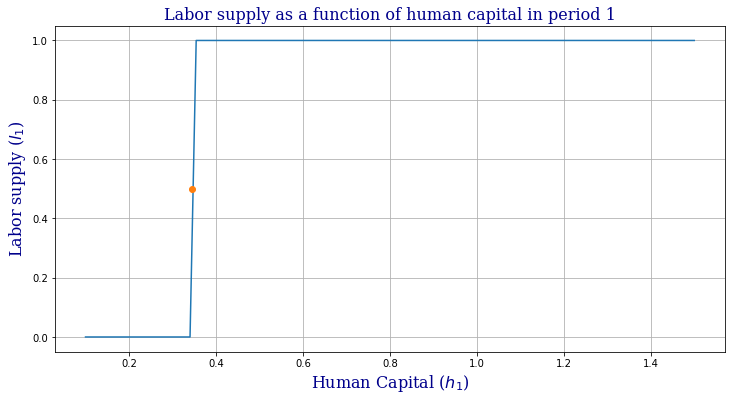

In [114]:
# Solve model #CHANGED
l1_vec,v1_vec = solve_period_1(rho,gamma,beta,Delta,v1,v2_interp)

# Figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(h_vec,l1_vec)

# Labels
font = {'family':'serif','color':'darkblue','weight':'normal','size': 16,}
ax.set_xlabel('Human Capital ($h_1$)', fontdict=font)
ax.set_ylabel('Labor supply ($l_1$)', fontdict=font)
ax.set_title('Labor supply as a function of human capital in period 1', fontdict=font)
ax.plot(0.345,0.5,marker='o') # Guessed value
ax.grid()

**Changed**

We see again that with low human capital you will decide not to work in period two, in fact you will only work if your level of human capital is over 0.345.

Below we have quickly found the kink in human capital with a short analytical solution.

### Question 1.3

**CHANGED**
To investigate if she will choose never to work, we instead look at on labor supply as as a functions of potential wages. We choose the highest level of human capital as we see, that the tendency is, that higher human capital leads to working. This is because she gets utility of higher human capital, and working leads to higher human capital.

We will start by solving period 2.

In [122]:
rho = 2
beta = 0.96
gamma = 0.1
b = 1
Delta = 0.1

In [123]:
def utility(c,rho):
    return c**(1-rho)/(1-rho)

def c(w,h,l,b):
    return w*h*l + b*(1-l)

def bequest(l,gamma):
    return gamma*l

def v2(w,h2,l2,b,rho,gamma):
    return utility(c(w,h2,l2,b),rho) - bequest(l2,gamma)

def v1(h1,l1,v2_interp,Delta,w,b,rho,gamma,beta):
    
    # a. v2 value, if no accumulation of humancapital
    h2_No = h1 + l1 + 0
    v2_No = v2_interp([h2_No])[0]
    
    # b. v2 value, if accumulation of human capital
    h2_Yes = h1 + l1 + Delta
    v2_Yes = v2_interp([h2_Yes])[0]
    
    # c. expected v2 value
    v2 = 0.5*v2_No + 0.5*v2_Yes
    
    # d. total value
    return utility(c(w,h1,l1,b),rho) - bequest(l1,gamma) + beta*v2

**CHANGED**
The function for period 2 is now dependent on a vector of values for income wage from approx. zero to two.

In [124]:
h2 = 1.5
w_vec = np.linspace(1e-8,2,100)

def solve_period_2_2(rho,gamma,Delta):
    
    # Vectors
    l2_vec = np.empty(100)
    v2_vec = np.empty(100)
    
    # Solve for each h2
    for i,w in enumerate(w_vec):
        
        # to work or not to work; if utility is higher when not working, then you will not work, else you work
        if v2(w,h2,1,b,rho,gamma) < v2(w,h2,0,b,rho,gamma):
            l2_vec[i] = 0
        else:
            l2_vec[i] = 1
        
        v2_vec[i] = v2(w,h2,l2_vec[i],b,rho,gamma)
        
    return l2_vec, v2_vec

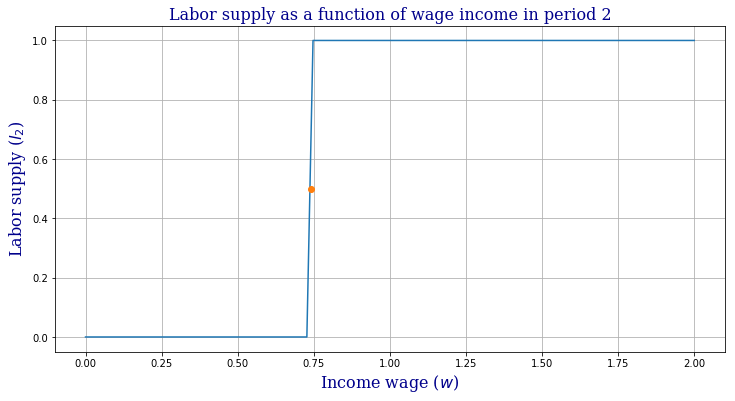

In [132]:
# Solving
l2_vec,v2_vec = solve_period_2_2(rho,gamma,Delta)

# Figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(w_vec,l2_vec)

# Labels
font = {'family':'serif','color':'darkblue','weight':'normal','size': 16,}
ax.set_xlabel('Income wage ($w$)', fontdict=font)
ax.set_ylabel('Labor supply ($l_2$)', fontdict=font)
ax.set_title('Labor supply as a function of wage income in period 2', fontdict=font)
ax.grid()
ax.plot(0.7407,0.5,marker='o')

**CHANGED**
If the wage is below 0.741 she will not work in periode 2, if the worker have a lower level of human capital than 1.5. This limit will increase, meaning lower human capital leads to higher wage demand. As utility decrease with the level of human capital, the wage will have to increase for the worker to choose to work.

To find the exact limit value of income wage we have done a short analytical solution below.

In [129]:
# Symbols
w = sm.symbols('w')
h_2 = sm.symbols('h_2')
rho = sm.symbols('rho')
gamma = sm.symbols('gamma')
v21 = sm.symbols('v_{2, l=1}')
v20 = sm.symbols('v_{2, l=0}')
b = sm.symbols('b')

Utility when working:


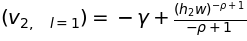

Utility whn not working:


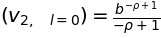

The kink in income wage is then where the two utilities are equal, so we set them equal and isolate w:


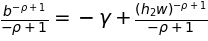

[(b**(-rho + 1) - gamma*rho + gamma)**(-1/(rho - 1))/h_2]


In [130]:
# Solves for the kink point in income wage i period 2
print(f'Utility when working:')
v_21 = (w*h_2*1)**(1-rho)/(1-rho)-gamma
display(sm.Eq(v21,v_21))
print(f'Utility whn not working:')
v_20 = b**(1-rho)/(1-rho)
display(sm.Eq(v20,v_20))
print(f'The kink in income wage is then where the two utilities are equal, so we set them equal and isolate w:')
display(sm.Eq(v_20,v_21))
f = v_21-v_20
fs = sm.solve(f,w)
print(fs)
fs

In [131]:
rho = 2
beta = 0.96
gamma = 0.1
h_2 = 1.5
b = 1
print(f'{(b**(-rho + 1) - gamma*rho + gamma)**(-1/(rho - 1))/h_2:.4f}')

0.7407


Now we will solve for period 1, using the same the same procedure as above.

In [ ]:
h1 = 1.5

def solve_period_1_2(rho,gamma,beta,Delta,v1,v2_interp):
    
    # Vectors
    l1_vec = np.empty(100)
    v1_vec = np.empty(100)
    
    # Solve for each h1
    for i,w in enumerate(w_vec):
             
        # to work or not to work; if utility is higher when not working, then you will not work, else you work
        if v1(h1,1,v2_interp,Delta,w,b,rho,gamma,beta) < v1(h1,0,v2_interp,Delta,w,b,rho,gamma,beta):
            l1_vec[i] = 0
        else:
            l1_vec[i] = 1
        
        v1_vec[i] = v1(h1,l1_vec[i],v2_interp,Delta,w,b,rho,gamma,beta)
        
    return l1_vec, v1_vec

# Construct interpolator
v2_interp = interpolate.RegularGridInterpolator((w_vec,), v2_vec, bounds_error=False, fill_value=None)

In [ ]:
# Solving
l1_vec,v1_vec = solve_period_1_2(rho,gamma,beta,Delta,v1,v2_interp)

# Figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(w_vec,l1_vec)

# Labels
font = {'family':'serif','color':'darkblue','weight':'normal','size': 16,}
ax.set_xlabel('Income wage ($w$)', fontdict=font)
ax.set_ylabel('Labor supply ($l_1$)', fontdict=font)
ax.set_title('Labor supply as a function of income wage in period 1', fontdict=font)
ax.grid()
ax.plot(0.619,0.5,marker='o') # guess

In [ ]:
# Symbols
w = sm.symbols('w')
h_1 = sm.symbols('h_1')
rho = sm.symbols('rho')
gamma = sm.symbols('gamma')
v11 = sm.symbols('v_{1, l=1}')
v10 = sm.symbols('v_{1, l=0}')
b = sm.symbols('b')
beta = sm.symbols('beta')
v2 = sm.symbols('E{[v_2]}')

In [ ]:
# Solves for the kink point in human capial i period 2
print(f'Utility when working:')
v_11 = (w*h_1*1)**(1-rho)/(1-rho)-gamma+beta*v2
display(sm.Eq(v11,v_11))
print(f'Utility whn not working:')
v_10 = b**(1-rho)/(1-rho)
display(sm.Eq(v10,v_10))
print(f'The kink in human capital is then where the two utilities are equal, so we set them equal and isolate h_2:')
display(sm.Eq(v_10,v_11))
f1 = v_11-v_10
f1s = sm.solve(f1,w)
print(f1s)
f1s

In [ ]:
rho = 2
beta = 0.96
gamma = 0.1
h2 = 1.5
b = 1
w = (b**(-rho + 1) - gamma*rho + gamma)**(-1/(rho - 1))/h2
print(f'{w:.4f}')

In [ ]:
#Expected v_2
v2 = (w*h2*1)**(1-rho)/(1-rho)-gamma
print(f'{v2:.20f}')

In [ ]:
h1 = 1.5
print(f'{(v2*beta*rho - v2*beta + b**(-rho + 1) - gamma*rho + gamma)**(-1/(rho - 1))/h1:.4f}')

Again, this is not corret, but the illustration above is correct, and show the level of income wage where no one will work.

# AS-AD model

Consider the following **AS-AD model**. The **goods market equilibrium** is given by

$$ y_{t} = -\alpha r_{t} + v_{t} $$

where $y_{t}$ is the **output gap**, $r_{t}$ is the **ex ante real interest** and $v_{t}$ is a **demand disturbance**. 

The central bank's **Taylor rule** is

$$ i_{t} = \pi_{t+1}^{e} + h \pi_{t} + b y_{t}$$

where $i_{t}$ is the **nominal interest rate**, $\pi_{t}$ is the **inflation gap**, and $\pi_{t+1}^{e}$ is the **expected inflation gap**. 

The **ex ante real interest rate** is given by 

$$ r_{t} = i_{t} - \pi_{t+1}^{e} $$

Together, the above implies that the **AD-curve** is

$$ \pi_{t} = \frac{1}{h\alpha}\left[v_{t} - (1+b\alpha)y_{t}\right]$$

Further, assume that the **short-run supply curve (SRAS)** is given by

$$ \pi_{t} = \pi_{t}^{e} + \gamma y_{t} + s_{t}$$

where $s_t$ is a **supply disturbance**.

**Inflation expectations are adaptive** and given by

$$ \pi_{t}^{e} = \phi\pi_{t-1}^{e} + (1-\phi)\pi_{t-1}$$

Together, this implies that the **SRAS-curve** can also be written as

$$ \pi_{t} = \pi_{t-1} + \gamma y_{t} - \phi\gamma y_{t-1} + s_{t} - \phi s_{t-1} $$

The **parameters** of the model are:

In [ ]:
par = {}

par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075

## **Answer 2**: AS-AD Model

**Question 1:** Use the ``sympy`` module to solve for the equilibrium values of output, $y_t$, and inflation, $\pi_t$, (where AD = SRAS) given the parameters ($\alpha$, $h$, $b$, $\alpha$, $\gamma$) and $y_{t-1}$ , $\pi_{t-1}$, $v_t$, $s_t$, and $s_{t-1}$.

### **Answer 2.1:**  

We start by defining the functions, and for that we need to make sympy symbols.

In [ ]:
# Defining variables for sympy math symbols

# Variables
y_t = sm.symbols('y_t')
r_t = sm.symbols('r_t')
v_t = sm.symbols('v_t')
i_t = sm.symbols('i_t')
pie_plus = sm.symbols('\pi^e_{t+1}')
pi_t = sm.symbols('pi_t')
pie_t = sm.symbols('\pi^e_t')
s_t = sm.symbols('s_t')
pie_minus = sm.symbols('\pi^e_{t-1}')
pi_minus = sm.symbols('\pi_{t-1}')
y_minus = sm.symbols('y_{t-1}')
s_minus = sm.symbols('s_{t-1}')

# Parameters
alpha = sm.symbols('alpha')
h = sm.symbols('h')
b = sm.symbols('b')
gamma = sm.symbols('gamma')
phi = sm.symbols('phi')

The model functions.

In [ ]:
print(f'The goods market equilibrium:')
fy_t = -alpha*r_t+v_t
display(sm.Eq(y_t,fy_t))
print(f'The Taylor rule:')
fi_t = pie_plus + h*pi_t + b*y_t
display(sm.Eq(i_t,fi_t))
print(f'The ex ante real interest rate:')
fr_t = i_t - pie_plus
display(sm.Eq(r_t,fr_t))
print(f'The AD-curve:')
fpi_t_AD = (1/(h*alpha))*(v_t - (1 + b*alpha)*y_t)
display(sm.Eq(pi_t,fpi_t_AD))
print(f'The short-run supply curve (SRAS):')
fpi_t_SRAS = pie_t + gamma*y_t + s_t
display(sm.Eq(pi_t,fpi_t_SRAS))
print(f'Inflation expectations:')
fpie_t_in = phi*pie_minus + (1 - phi)*pi_minus
display(sm.Eq(pie_t,fpie_t_in))
print(f'SRAS-curve with inflation expectations:')
fpi_t_SRAS_in = pi_minus + gamma*y_t - phi*gamma*y_minus + s_t - phi*s_minus
display(sm.Eq(pi_t,fpi_t_SRAS_in))

Now we will solve for the equilibrium value of output, \$y_t$, by setting the SRAS-curve and AD-curve equal to each other. 

In [ ]:
SRAS_curve = fpi_t_SRAS_in
AD_curve = fpi_t_AD

# Equalizing
print(f'AD=SRAS')
equal =  AD_curve-SRAS_curve
display(sm.Eq(AD_curve,SRAS_curve))

# Solving the model
equal_solve_y = sm.solve(equal,y_t)[0]
display(sm.Eq(y_t,equal_solve_y))

We will insert our equilibrium value of output into the SRAS-curve function to find $\pi_t$.

In [ ]:
print(f'SRAS-curve, with solved y_t:')
SRAS_curve_solve_y = pi_minus + gamma*equal_solve_y - phi*gamma*y_minus + s_t - phi*s_minus
display(sm.Eq(pi_t,SRAS_curve_solve_y))

We have now solved for the equilibrium values of output and inflation given parameters and values.

**Question 2:** Find and illustrate the equilibrium when $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$. Illustrate how the equilibrium changes when instead $v_t = 0.1$.

### **Answer 2.2:**  

We now set the variables to 0 and calculate the equilibrium values for the output gap and inflation gap.

In [ ]:
print(equal_solve_y)
equal_solve_y

In [ ]:
(-0*alpha*h + alpha*gamma*h*phi*0 + alpha*h*phi*0 - alpha*h*0 + 0)/(alpha*b + alpha*gamma*h + 1)

In [ ]:
print(SRAS_curve_solve_y)
SRAS_curve_solve_y

In [ ]:
0 - gamma*phi*0 + gamma*(-0*alpha*h + alpha*gamma*h*phi*0 + alpha*h*phi*0 - alpha*h*0 + 0)/(alpha*b + alpha*gamma*h + 1) - phi*0 + 0

To get a closer look we start by defining the variable values that we were given.

In [ ]:
# Variable values
var = {}

var['y_minus'] = 0
var['pi_minus'] = 0
var['s_minus'] = 0
var['s'] = 0
var['v'] = 0
var['v_new'] = 0.1

In [ ]:
# y
y_value = sm.lambdify((alpha,h,b,phi,gamma,y_minus,pi_minus,s_minus, s_t,v_t),equal_solve_y)
y_print = y_value(par['alpha'], par['h'],par['b'],par['phi'],par['gamma'],var['y_minus'],var['pi_minus'],var['s_minus'],var['s'],var['v'])
print(f'The EQ value of the output gap is {y_print}')

# pi
pi_value = sm.lambdify((alpha,h,b,phi,gamma,y_minus,pi_minus,s_minus, s_t,v_t),SRAS_curve_solve_y)
pi_print = pi_value(par['alpha'], par['h'],par['b'],par['phi'],par['gamma'],var['y_minus'],var['pi_minus'],var['s_minus'],var['s'],var['v'])
print(f'The EQ value of the inflation gap is {pi_print}')

In [ ]:
# y with demand shock
print(f'Values of the output gap and the inflation gap, with demand shock of 0.1:')
y_value = sm.lambdify((alpha,h,b,phi,gamma,y_minus,pi_minus,s_minus, s_t,v_t),equal_solve_y)
y_print = y_value(par['alpha'], par['h'],par['b'],par['phi'],par['gamma'],var['y_minus'],var['pi_minus'],var['s_minus'],var['s'],var['v_new'])
print(f'The value of the output gap is {y_print}')

# pi with demand shock
pi_value = sm.lambdify((alpha,h,b,phi,gamma,y_minus,pi_minus,s_minus, s_t,v_t),SRAS_curve_solve_y)
pi_print = pi_value(par['alpha'], par['h'],par['b'],par['phi'],par['gamma'],var['y_minus'],var['pi_minus'],var['s_minus'],var['s'],var['v_new'])
print(f'The value of the inflation gap is {pi_print}')

When all the parameters are equal to 0, we see that the equilibrium values are also 0. This make sense, as their is no gap in equilibrium. The economy is now hit by a demand shock, $v_t = 0.1$ and we now see positive gaps in both output and inflation. This is great in accordance with economic theory.

Now we want to illustrate the AD-SRAS curve, so we define the two functions.

In [ ]:
# Defining the AD and SRAS functions
def AD(y_t,h,b,alpha,v_t):
    return (1/(h*alpha))*(v_t - (1 + b*alpha)*y_t)

def SRAS(pi_minus,gamma,y_t,phi,y_minus,s_t,s_minus):
    return pi_minus + gamma*y_t - phi*gamma*y_minus + s_t - phi*s_minus

We now define the plot, including a slider so we can change between $v_t = 0$ $and$ $v_t = 0.1$

In [ ]:
#Defining plot
def AD_AS_plot(v_value):

    y_lin = np.linspace(-0.2,0.2,100)
    AD_curve = AD(y_t=y_lin,h=par['h'],b=par['b'],alpha=par['alpha'],v_t=v_value)
    AD_curve_v = AD(y_t=y_lin,h=par['h'],b=par['b'],alpha=par['alpha'],v_t=v_value+0.1)
    SRAS_curve = SRAS(pi_minus=var['pi_minus'], gamma=par['gamma'], y_t=y_lin, phi=par['phi'], y_minus=var['y_minus'], s_t=var['s'], s_minus=var['s_minus'])
    
    font = {'family':'serif','color':'darkblue','weight':'normal','size': 18,}

    plt.figure(figsize=(12,8))
    plt.plot(y_lin,AD_curve)
    plt.plot(y_lin,AD_curve_v)
    plt.plot(y_lin,SRAS_curve)
    plt.title('Illustration of AD & SRAS',fontdict=font)
    plt.grid(True)
    plt.xlabel('Output gap',fontdict=font)
    plt.ylabel('Inflation gap',fontdict=font)
    plt.legend(('AD - no shock', 'AD - demand shock', 'SRAS'), loc='best',prop={'size':18})
    
    return plt

plt.show(AD_AS_plot(0))

From the figure above, we see that it is only the AD curve initially changes, when the economy is hit by a demand shock. It shifts right and the inflation and output increases initially.

The figure also shows us the equilibrium we found earlier: No shock (0,0) and with shock (0.025 , 0.002)

**Persistent disturbances:** Now, additionaly, assume that both the demand and the supply disturbances are AR(1) processes

$$ v_{t} = \delta v_{t-1} + x_{t} $$
$$ s_{t} = \omega s_{t-1} + c_{t} $$

where $x_{t}$ is a **demand shock**, and $c_t$ is a **supply shock**. The **autoregressive parameters** are:

In [ ]:
par['delta'] = 0.80
par['omega'] = 0.15

**Question 3:** Starting from $y_{-1} = \pi_{-1} = s_{-1} = 0$, how does the economy evolve for $x_0 = 0.1$, $x_t = 0, \forall t > 0$ and $c_t = 0, \forall t \geq 0$?

### **Answer 2.3:**

We are now given new information about how the demand and supply shocks behave. They are now given by AR(1) processes. We will start by defining this new addition to the model.

In [ ]:
# Defining new shocks
def v_t(v_minus,x):
    return par['delta']*v_minus+x
def s_t(s_minus,c):
    return par['omega']*s_minus+c

We started off limiting our model to 10 periods. But after running the simulation once, we saw that we didn't get back to equilibrium. Instead we will set $T$ to $100$.
Also we will set $x_0$ to be equal to $0.1$.

In [ ]:
# Definging periods, vectors, c, x and x_0
T = 100
y_vec = [0]
pi_vec = [0]
v_vec = [0]
s_vec = [0]
c_vec = np.zeros(T)
x_vec = np.zeros(T)
x_vec[1] = 0.1 # the first period is t-1

In [ ]:
# Simulation of AD-AS Model
for t in range(1,T):
    
    v_vec.append(v_t(v_vec[t-1], x_vec[t]))
    s_vec.append(s_t(s_vec[t-1], c_vec[t]))
    y_vec.append(y_value(par['alpha'], par['h'],par['b'],par['phi'],par['gamma'],y_vec[t-1],pi_vec[t-1],s_vec[t-1],s_vec[t],v_vec[t]))
    pi_vec.append(pi_value(par['alpha'], par['h'],par['b'],par['phi'],par['gamma'],y_vec[t-1],pi_vec[t-1],s_vec[t-1],s_vec[t],v_vec[t]))

In [ ]:
# Creating a figure
periods = np.linspace(0,T,T)

plot = plt.figure(figsize=(8,12))

font = {'family':'serif','color':'darkblue','weight':'normal','size': 18,}

ax = plot.add_subplot(311)
ax2 = plot.add_subplot(312)
ax3 = plot.add_subplot(313)

ax.plot(y_vec,pi_vec)
ax.set_title('Output gap and Inflation Gap',fontdict=font)
ax.set_xlabel('Output gap',fontdict=font)
ax.set_ylabel('Inflation gap',fontdict=font)
ax.grid(linestyle='--', linewidth=1)

ax2.plot(periods,y_vec)
ax2.set_title('Output gap development over T periods',fontdict=font)
ax2.set_xlabel('Time',fontdict=font)
ax2.set_ylabel('Output gap',fontdict=font)
ax2.grid(linestyle='--', linewidth=1)

ax3.plot(periods,pi_vec)
ax3.set_title('Inflation gap development over T periods',fontdict=font)
ax3.set_xlabel('Time',fontdict=font)
ax3.set_ylabel('Inflation gap',fontdict=font)
ax3.grid(linestyle='--', linewidth=1)

plt.tight_layout()

From the above figure, we see that in period 0 the economy gets hit by a shock. This from the $x_0$ value of 0.1. Compared to the model from last question, where we see the shock hit the economy, but immediately the period after, returns to the equilibrium. We now see convergence in the economy over time.

**Stochastic shocks:** Now, additionally, assume that $x_t$ and $c_t$ are stochastic and normally distributed

$$ x_{t}\sim\mathcal{N}(0,\sigma_{x}^{2}) $$
$$ c_{t}\sim\mathcal{N}(0,\sigma_{c}^{2}) $$

The **standard deviations of the shocks** are:

In [ ]:
par['sigma_x'] = 3.492
par['sigma_c'] = 0.2

**Question 4:** Simulate the AS-AD model for 1,000 periods. Calculate the following five statistics:

1. Variance of $y_t$, $var(y_t)$
2. Variance of $\pi_t$, $var(\pi_t)$
3. Correlation between $y_t$ and $\pi_t$, $corr(y_t,\pi_t)$
4. Auto-correlation between $y_t$ and $y_{t-1}$, $corr(y_t,y_{t-1})$
5. Auto-correlation between $\pi_t$ and $\pi_{t-1}$, $corr(\pi_t,\pi_{t-1})$

### **Answer 2.4:**

We are now given additional new information about how the stochastic shocks are distributed. We are given these standard deviations above.

In [ ]:
# Defining periods, vectors, c, x and x_0
seed = 2019
np.random.seed(seed)

T = 1000
y_vec2 = [0]
pi_vec2 = [0]
v_vec2 = [0]
s_vec2 = [0]
x_vec2 = np.random.normal(loc=0,scale=par['sigma_x'],size=T)
c_vec2 = np.random.normal(loc=0,scale=par['sigma_c'],size=T)

In [ ]:
# Simulation of AD-AS Model
for t in range(1,T):
    
    v_vec2.append(v_t(v_vec2[t-1], x_vec2[t]))
    s_vec2.append(s_t(s_vec2[t-1], c_vec2[t]))
    
    y_vec2.append(y_value(par['alpha'], par['h'],par['b'],par['phi'],par['gamma'],y_vec2[t-1],pi_vec2[t-1],s_vec2[t-1],s_vec2[t],v_vec2[t]))
    pi_vec2.append(pi_value(par['alpha'], par['h'],par['b'],par['phi'],par['gamma'],y_vec2[t-1],pi_vec2[t-1],s_vec2[t-1],s_vec2[t],v_vec2[t]))

In [ ]:
# Creating a figure
periods2 = np.linspace(0,T,T)

font = {'family':'serif','color':'darkblue','weight':'normal','size': 18,}

plot2 = plt.figure(figsize=(8,12))

ax = plot2.add_subplot(311)
ax2 = plot2.add_subplot(312)
ax3 = plot2.add_subplot(313)

ax.plot(y_vec2,pi_vec2)
ax.set_title('Output gap and Inflation Gap',fontdict=font)
ax.set_xlabel('Output gap',fontdict=font)
ax.set_ylabel('Inflation gap',fontdict=font)
ax.grid(linestyle='--', linewidth=1)

ax2.plot(periods2,y_vec2)
ax2.set_title('Output gap development over T periods',fontdict=font)
ax2.set_xlabel('Periods',fontdict=font)
ax2.set_ylabel('Output gap',fontdict=font)
ax2.grid(linestyle='--', linewidth=1)

ax3.plot(periods2,pi_vec2)
ax3.set_title('Inflation gap development over T periods',fontdict=font)
ax3.set_xlabel('Periods',fontdict=font)
ax3.set_ylabel('Inflation gap',fontdict=font)
ax3.grid(linestyle='--', linewidth=1)

plt.tight_layout()

Looking at first plot above, we now see that output and inflation moves around a lot, compared to the model before. Compared to the model before, we now have an economy that is constantly hit, by small shocks on both demand and supply and the model. Whereas the model before was only hit once and then the shock disappears over time. We can also see that the gaps are now mean reverting and can be seen as stationary. We will now move on to find the five statistics.

In [ ]:
y_pi_corr = np.corrcoef(y_vec2,pi_vec2)
y_auto = np.corrcoef(y_vec2[1:],y_vec2[:-1])
pi_auto = np.corrcoef(pi_vec2[1:],pi_vec2[:-1])

print(f'The variance of the output gap is: var(y_t) = {np.var(y_vec2):.4f}')
print(f'The variance of the inflation gap is: var(pi_t) = {np.var(pi_vec2):.4f}')
print(f'The correlation between the output gap and the inflation gap is: corr(y_t,pi_t) = {y_pi_corr[0,1]:.4f}')
print(f'The autocorrelation between the output gap and the ougput gap in the previous period is: corr(y_t,y_t-1) = {y_auto[0,1]:.4f}')
print(f'The autocorrelation between the inflation gap and the inflation gap in the previous period is: corr(pi_t,pi_t-1) = {pi_auto[0,1]:.4f}') 

**Question 5:** Plot how the correlation between $y_t$ and $\pi_t$ changes with $\phi$. Use a numerical optimizer or root finder to choose $\phi\in(0,1)$ such that the simulated correlation between $y_t$ and $\pi_t$ comes close to 0.31. 

### **Answer 2.5:**

In order to plot the correlation, we will create a simulation that, creates different y values and pi values, but all other parameters equal to the earlier questions. To do this, we will simulate the results by creating a simulation 

In [ ]:
# Setting seed, periods and simulation x and c
seed = 2019
np.random.seed(seed)

T = 1000
x_vec3 = np.random.normal(loc=0,scale=par['sigma_x'],size=T)
c_vec3 = np.random.normal(loc=0,scale=par['sigma_c'],size=T)

In [ ]:
# Simulation of AS-AD Model with change in phi
def simulation_phi(phi):
    y_vec3 = [0]
    pi_vec3 = [0]
    v_vec3 = [0]
    s_vec3 = [0]
    y_pi_corr2 = [0]
    for t in range(1,T):

        v_vec3.append(v_t(v_vec3[t-1], x_vec3[t]))
        s_vec3.append(s_t(s_vec3[t-1], c_vec3[t]))
    
        y_vec3.append(y_value(par['alpha'], par['h'],par['b'],phi,par['gamma'],y_vec3[t-1],pi_vec3[t-1],s_vec3[t-1],s_vec3[t],v_vec3[t]))
        pi_vec3.append(pi_value(par['alpha'], par['h'],par['b'],phi,par['gamma'],y_vec3[t-1],pi_vec3[t-1],s_vec3[t-1],s_vec3[t],v_vec3[t]))
   
            
    y_pi_corr2 = np.corrcoef(y_vec3, pi_vec3)[1,0]
    
    return y_vec3, pi_vec3, y_pi_corr2

y_vec3, pi_vec3, y_pi_corr2 = simulation_phi(par['phi'])

We will now simulate the model for $\phi$ to create the plot data for the correlation between $y$ and $\pi$. After this we will plot the change in correlation and comment.

In [ ]:
#Simulating plot data
phi_plot = np.linspace(1e-8,1,T)
corr_plot = []

for x in phi_plot:
    y_vec3, pi_vec3, y_pi_corr2 = simulation_phi(x)
    corr_plot.append(y_pi_corr2)

In [ ]:
# Plotting correlation
plt.figure(dpi=100)
plt.xlabel('$\phi$')
plt.ylabel('Correlation')
plt.title('Figure showing correlation between $y$ and $pi$')
plt.plot(phi_plot,corr_plot, color = 'lightblue')
plt.legend('Correlation', loc='best')
plt.grid()
plt.show()
plt.tight_layout()

From the figure above, we see that when the correlation is around 0.31, that we have a $\phi$ of approx 0.95. We also see, that the correlation is increasing in $\phi$. We will now use sympy optimizer to find the value of $\phi$ that creates a correlation between $y$ and $\pi$ of exactly $0.31$

In [ ]:
obj_phi = lambda phi: np.corrcoef(simulation_phi(phi)[0], simulation_phi( phi)[1])[1,0] - 0.31

result = optimize.root_scalar(obj_phi, x0 = 0.9, bracket = [0,1], method = 'brentq')

phi_opt = result.root
print(f'The optimized phi is, {phi_opt:.4f}')
print(f'Test for correlation of this phi is, {np.corrcoef(simulation_phi(phi_opt)[0], simulation_phi(phi_opt)[1])[1,0]:.4f}')

This results makes sense when we look at the figure above. We also set out initial guess, close enough, as we could see on the figure, that it was close to 0.9

**Quesiton 6:** Use a numerical optimizer to choose $\sigma_x>0$, $\sigma_c>0$ and $\phi\in(0,1)$ to make the simulated statistics as close as possible to US business cycle data where:

1. $var(y_t) = 1.64$
2. $var(\pi_t) = 0.21$
3. $corr(y_t,\pi_t) = 0.31$
4. $corr(y_t,y_{t-1}) = 0.84$
5. $corr(\pi_t,\pi_{t-1}) = 0.48$

### **Answer 2.6:**

In [ ]:
# Setting seed, periods and simulation x and c
seed = 2019
np.random.seed(seed)

T = 1000


In [ ]:
# Simulation of AS-AD Model with change in phi
def simulation_opt(phi,sigma_x,sigma_c):
    y_vec3 = [0]
    pi_vec3 = [0]
    v_vec3 = [0]
    s_vec3 = [0]
    y_pi_corr2 = [0]
    x_vec3 = np.random.normal(loc=0,scale=sigma_x,size=T)
    c_vec3 = np.random.normal(loc=0,scale=sigma_c,size=T)
    for t in range(1,T):

        v_vec3.append(v_t(v_vec3[t-1], x_vec3[t]))
        s_vec3.append(s_t(s_vec3[t-1], c_vec3[t]))
    
        y_vec3.append(y_value(par['alpha'], par['h'],par['b'],phi,par['gamma'],y_vec3[t-1],pi_vec3[t-1],s_vec3[t-1],s_vec3[t],v_vec3[t]))
        pi_vec3.append(pi_value(par['alpha'], par['h'],par['b'],phi,par['gamma'],y_vec3[t-1],pi_vec3[t-1],s_vec3[t-1],s_vec3[t],v_vec3[t]))
   
            
    y_pi_corr2 = np.corrcoef(y_vec3, pi_vec3)[1,0]
    
    return y_vec3, pi_vec3, y_pi_corr2

y_vec3, pi_vec3, y_pi_corr2 = simulation_opt(par['phi'],par['sigma_x'],par['sigma_c'])

In [ ]:
obj = lambda phi: np.corrcoef(simulation_opt(phi,sigma_x,sigma_c)[0], simulation_opt(phi,sigma_x,sigma_c)[1])[1,0] - 0.31

result = optimize.root_scalar(obj, x0 = 0,  bracket = [0,1], method = 'brentq')

param_opt = result.root

# Exchange economy

Consider an **exchange economy** with

1. 3 goods, $(x_1,x_2,x_3)$
2. $N$ consumers indexed by \\( j \in \{1,2,\dots,N\} \\)
3. Preferences are Cobb-Douglas with log-normally distributed coefficients

    $$ \begin{eqnarray*}
    u^{j}(x_{1},x_{2},x_{3}) &=& 
    \left(x_{1}^{\beta_{1}^{j}}x_{2}^{\beta_{2}^{j}}x_{3}^{\beta_{3}^{j}}\right)^{\gamma}\\
     &  & \,\,\,\beta_{i}^{j}=\frac{\alpha_{i}^{j}}{\alpha_{1}^{j}+\alpha_{2}^{j}+\alpha_{3}^{j}} \\
     &  & \,\,\,\boldsymbol{\alpha}^{j}=(\alpha_{1}^{j},\alpha_{2}^{j},\alpha_{3}^{j}) \\ 
     &  & \,\,\,\log(\boldsymbol{\alpha}^j) \sim \mathcal{N}(\mu,\Sigma) \\
    \end{eqnarray*} $$

4. Endowments are exponentially distributed,

$$
\begin{eqnarray*}
\boldsymbol{e}^{j} &=& (e_{1}^{j},e_{2}^{j},e_{3}^{j}) \\
 &  & e_i^j \sim f, f(z;\zeta) =  1/\zeta \exp(-z/\zeta)
\end{eqnarray*}
$$

Let $p_3 = 1$ be the **numeraire**. The implied **demand functions** are:

$$
\begin{eqnarray*}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j})&=&\beta^{j}_i\frac{I^j}{p_{i}} \\
\end{eqnarray*}
$$

where consumer $j$'s income is

$$I^j = p_1 e_1^j + p_2 e_2^j +p_3 e_3^j$$

The **parameters** and **random preferences and endowments** are given by:

In [ ]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

**Question 1:** Plot the histograms of the budget shares for each good across agents.

Consider the **excess demand functions:**

$$ z_i(p_1,p_2) = \sum_{j=1}^N x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) - e_i^j$$

**Question 2:** Plot the excess demand functions.

**Quesiton 3:** Find the Walras-equilibrium prices, $(p_1,p_2)$, where both excess demands are (approximately) zero, e.g. by using the following tâtonnement process:

1. Guess on $p_1 > 0$, $p_2 > 0$ and choose tolerance $\epsilon > 0$ and adjustment aggressivity parameter, $\kappa > 0$.
2. Calculate $z_1(p_1,p_2)$ and $z_2(p_1,p_2)$.
3. If $|z_1| < \epsilon$ and $|z_2| < \epsilon$ then stop.
4. Else set $p_1 = p_1 + \kappa \frac{z_1}{N}$ and $p_2 = p_2 + \kappa \frac{z_2}{N}$ and return to step 2.

**Question 4:** Plot the distribution of utility in the Walras-equilibrium and calculate its mean and variance.

**Question 5:** Find the Walras-equilibrium prices if instead all endowments were distributed equally. Discuss the implied changes in the distribution of utility. Does the value of $\gamma$ play a role for your conclusions?

## **Answer 3**: Exchange economy

**Question 1:** Plot the histograms of the budget shares for each good across agents.

### **Answer 3.1:**

We see from the demand function that the budget shares are the betas, we take a look at them below.

In [ ]:
print(betas)
print(betas.shape)
print(type(betas))

We have three columns in for each good, below we plot them as histograms.

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

font = {'family':'serif','color':'darkblue','weight':'normal','size': 16,}

ax1.hist(betas[:,0], bins=100)
ax2.hist(betas[:,1], bins=100)
ax3.hist(betas[:,2], bins=100)

fig.suptitle('Histograms of the budget shares',fontsize=20)
ax1.set_ylabel('Consumers',fontdict=font)
ax1.set_title('Good 1',fontdict=font)
ax1.grid(linestyle='--', linewidth=1)
ax2.set_title('Good 2',fontdict=font)
ax2.grid(linestyle='--', linewidth=1)
ax3.set_title('Good 3',fontdict=font)
ax3.grid(linestyle='--', linewidth=1)

Consider the **excess demand functions:**

$$ z_i(p_1,p_2) = \sum_{j=1}^N x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) - e_i^j$$

**Question 2:** Plot the excess demand functions.

### **Answer 3.2:**

In the next couple of questions a lot of the inspiration came from Problem set 2, Problem set 7.4 (again) and lecture notebook 4.

First we define the demand functions and excess demand functions for each good.

In [ ]:
# demand functions
def demand_good_1_func(betas,p1,p2,e1,e2,e3):
    I = p1*e1+p2*e2+e3
    return betas[:,0]*(I/p1)

def demand_good_2_func(betas,p1,p2,e1,e2,e3):
    I = p1*e1+p2*e2+e3
    return betas[:,1]*(I/p2)

def demand_good_3_func(betas,p1,p2,e1,e2,e3):
    I = p1*e1+p2*e2+e3
    return betas[:,2]*(I)

# excess demand functions
def excess_demand_good_1_func(betas,p1,p2,e1,e2,e3):
    
    # demand
    demand = np.sum(demand_good_1_func(betas,p1,p2,e1,e2,e3))
    
    # supply
    supply = np.sum(e1)
    
    # excess demand
    excess_demand = demand-supply
    
    return excess_demand

def excess_demand_good_2_func(betas,p1,p2,e1,e2,e3):
    
    # demand
    demand = np.sum(demand_good_2_func(betas,p1,p2,e1,e2,e3))
    
    # supply
    supply = np.sum(e2)
    
    # excess demand
    excess_demand = demand-supply
    
    return excess_demand

def excess_demand_good_3_func(betas,p1,p2,e1,e2,e3):
    
    # demand
    demand = np.sum(demand_good_3_func(betas,p1,p2,e1,e2,e3))
    
    # supply
    supply = np.sum(e3)
    
    # excess demand
    excess_demand = demand-supply
    
    return excess_demand

To plot the excess demand function for good 1 and good 2, we first define a price vector for each good, and set up grids for the prices and endowments.

In [ ]:
p1_vec = np.linspace(0.1,10,100)
p2_vec = np.linspace(0.1,10,100)
e1_grid = np.empty((100,100))
e2_grid = np.empty((100,100))

p1_grid,p2_grid = np.meshgrid(p1_vec,p2_vec,indexing='ij')

for i,p1 in enumerate(p1_vec):
    for j,p2 in enumerate(p2_vec):
        e1_grid[i,j] = excess_demand_good_1_func(betas,p1,p2,e1,e2,e3)
        e2_grid[i,j] = excess_demand_good_2_func(betas,p1,p2,e1,e2,e3)

We can not plot the two excess demand functions for good 1 and good 2.

In [ ]:
fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(2,1,1,projection='3d')
cs = ax.plot_surface(p1_grid,p2_grid,e1_grid,cmap=cm.jet)
font = {'family':'serif','color':'darkblue','weight':'normal','size': 16,}
ax.invert_xaxis()
ax.set_xlabel('$p_1$',fontdict=font)
ax.set_ylabel('$p_2$',fontdict=font)
ax.set_zlabel('$e_1$',fontdict=font)
ax.set_title('Excess demand for good 1',fontdict=font)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax1 = fig.add_subplot(2,1,2,projection='3d')
cs1 = ax1.plot_surface(p1_grid,p2_grid,e2_grid,cmap=cm.jet)
ax1.invert_xaxis()
ax1.set_xlabel('$p_1$',fontdict=font)
ax1.set_ylabel('$p_2$',fontdict=font)
ax1.set_zlabel('$e_2$',fontdict=font)
ax1.set_title('Excess demand for good 2',fontdict=font)
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False

**Quesiton 3:** Find the Walras-equilibrium prices, $(p_1,p_2)$, where both excess demands are (approximately) zero, e.g. by using the following tâtonnement process:

1. Guess on $p_1 > 0$, $p_2 > 0$ and choose tolerance $\epsilon > 0$ and adjustment aggressivity parameter, $\kappa > 0$.
2. Calculate $z_1(p_1,p_2)$ and $z_2(p_1,p_2)$.
3. If $|z_1| < \epsilon$ and $|z_2| < \epsilon$ then stop.
4. Else set $p_1 = p_1 + \kappa \frac{z_1}{N}$ and $p_2 = p_2 + \kappa \frac{z_2}{N}$ and return to step 2.

### **Answer 3.3:**

In [ ]:
# equilibrium function
def find_equilibrium(betas,p1,p2,p3,e1,e2,e3,kappa=1/3,eps=1e-8,maxiter=50000):
    
    t = 0
    while True:
        
        # excess demand
        Z1 = excess_demand_good_1_func(betas,p1,p2,e1,e2,e3)
        Z2 = excess_demand_good_2_func(betas,p1,p2,e1,e2,e3)
        
        # stop?
        if (np.abs(Z1) < eps or np.abs(Z2) < eps) or t >= maxiter:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
            print(f'{t:3d}: p2 = {p2:12.8f} -> excess demand -> {Z2:14.8f}')
            break
        
        # updata p1 and p2
        p1 = p1 + kappa*Z1/betas.size
        p2 = p2 + kappa*Z2/betas.size
        
        # return
        if t < 5 or t%2500 == 0:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
            print(f'{t:3d}: p2 = {p2:12.8f} -> excess demand -> {Z2:14.8f}')
        elif t == 5:
            print ('    ...')
        
        t += 1
    
    return p1, p2

# find equilibrium function
p1 = 0.1
p2 = 0.1
p3 = 1
kappa = 1/3
eps = 1e-8
p1,p2 = find_equilibrium(betas,p1,p2,p3,e1,e2,e3,kappa=kappa,eps=eps)

In [ ]:
Z1 = excess_demand_good_1_func(betas,p1,p2,e1,e2,e3)
Z2 = excess_demand_good_2_func(betas,p1,p2,e1,e2,e3)
print(Z1,Z2)
assert(np.abs(Z1) < 1e-5)
assert(np.abs(Z2) < 1e-5)
print(f'Walras-equilibrium price for good 1 is {p1:.4f}')
print(f'Walras-equilibrium price for good 2 is {p2:.4f}')

**Question 4:** Plot the distribution of utility in the Walras-equilibrium and calculate its mean and variance.

### **Answer 3.4:**

To plot the distribution of utility in the Walras-equilibrium we will first define the utility function below and then plot the utility for all consumers, for all tree goods, and for the equilibrium prices.

In [ ]:
def u(p1,p2,e1,e2,e3,betas,gamma):
    
    I = p1*e1 + p2*e2 + e3
    
    x1 = betas[:,0]*(I/p1)
    x2 = betas[:,1]*(I/p2)
    x3 = betas[:,0]*I
    
    utility = ((x1**betas[:,0])*(x2**betas[:,1])*(x3**betas[:,2]))**gamma
    
    return utility

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(u(p1,p2,e1,e2,e3,betas,gamma),bins=200)
font = {'family':'serif','color':'darkblue','weight':'normal','size': 16,}
ax.set_xlabel('Utility',fontdict=font)
ax.set_ylabel('Consumers',fontdict=font)
ax.set_title('Distribution of utility in the Walras-equilibrium',fontdict=font)
print(f'Walras-equilibrium prices:')
p1,p2

Above the distribution of utility is plotted as a histogram.
Now we will calculate the mean and variance.

In [ ]:
mean = np.mean(u(p1,p2,e1,e2,e3,betas,gamma))
var = np.var(u(p1,p2,e1,e2,e3,betas,gamma))
print(f'The mean of the distribution of utility is : {mean:.4f}')
print(f'The variance of the distribution of utility is : {var:.4f}')

**Question 5:** Find the Walras-equilibrium prices if instead all endowments were distributed equally. Discuss the implied changes in the distribution of utility. Does the value of $\gamma$ play a role for your conclusions?

### **Answer 3.5:**

In [ ]:
e1,e2,e3

In [ ]:
seed = 1986
np.random.seed(seed)
e = np.random.exponential(zeta,size=N)
e

In [ ]:
# demand functions
def demand_good_1_func2(betas,p1_new,p2_new,e):
    I = (p1_new+p2_new+1)*e
    return betas[:,0]*(I/p1_new)

def demand_good_2_func2(betas,p1_new,p2_new,e):
    I = (p1_new+p2_new+1)*e
    return betas[:,1]*(I/p2_new)

def demand_good_3_func2(betas,p1_new,p2_new,e):
    I = (p1_new+p2_new+1)*e
    return betas[:,2]*(I)

# excess demand functions
def excess_demand_good_1_func2(betas,p1_new,p2_new,e):
    
    # demand
    demand = np.sum(demand_good_1_func2(betas,p1_new,p2_new,e))
    
    # supply
    supply = np.sum(e)
    
    # excess demand
    excess_demand = demand-supply
    
    return excess_demand

def excess_demand_good_2_func2(betas,p1_new,p2_new,e):
    
    # demand
    demand = np.sum(demand_good_2_func2(betas,p1_new,p2_new,e))
    
    # supply
    supply = np.sum(e)
    
    # excess demand
    excess_demand = demand-supply
    
    return excess_demand

def excess_demand_good_3_func2(betas,p1_new,p2_new,e):
    
    # demand
    demand = np.sum(demand_good_3_func2(betas,p1_new,p2_new,e))
    
    # supply
    supply = np.sum(e)
    
    # excess demand
    excess_demand = demand-supply
    
    return excess_demand

In [ ]:
# equilibrium function
def find_equilibrium2(betas,p1_new,p2_new,p3_new,e,kappa=1/3,eps=1e-8,maxiter=50000):
    
    t = 0
    while True:
        
        # excess demand
        Z1 = excess_demand_good_1_func2(betas,p1_new,p2_new,e)
        Z2 = excess_demand_good_2_func2(betas,p1_new,p2_new,e)
        
        eps = 1e-8
        
        # stop?
        if (np.abs(Z1) < eps or np.abs(Z2) < eps) or t >= maxiter:
            print(f'{t:3d}: p1_new = {p1_new:12.8f} -> excess demand -> {Z1:14.8f}')
            print(f'{t:3d}: p2_new = {p2_new:12.8f} -> excess demand -> {Z2:14.8f}')
            break
        
        # updata p1 and p2
        p1_new = p1_new + kappa*Z1/betas.size
        p2_new = p2_new + kappa*Z2/betas.size
        
        # return
        if t < 5 or t%2500 == 0:
            print(f'{t:3d}: p1_new = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
            print(f'{t:3d}: p2_new = {p2:12.8f} -> excess demand -> {Z2:14.8f}')
        elif t == 5:
            print ('    ...')
        
        t += 1
    
    return p1_new, p2_new

# find equilibrium function
p1_new = 0.1
p2_new = 0.1
p3_new = 1
kappa = 1/3
eps = 1e-8
p1_new,p2_new = find_equilibrium2(betas,p1_new,p2,p3,e,kappa=kappa,eps=eps)

In [ ]:
p1,p1_new,p2,p2_new

In [ ]:
Z12 = excess_demand_good_1_func2(betas,p1_new,p2_new,e)
Z22 = excess_demand_good_2_func2(betas,p1_new,p2_new,e)
print(Z1,Z2,Z12,Z22)
assert(np.abs(Z1) < 1e-5)
assert(np.abs(Z2) < 1e-5)
print(f'Walras-equilibrium price for good 1 is {p1:.4f}')
print(f'Walras-equilibrium price for good 2 is {p2:.4f}')
print(f'Walras-equilibrium price for good 1 with equal edowment is {p1_new:.4f}')
print(f'Walras-equilibrium price for good 2 with equal edowment is {p2_new:.4f}')

In [ ]:
def u_new(p1_new,p2_new,e,betas,gamma):
    
    I = (p1 + p2 + 1)*e
    
    x1 = betas[:,0]*(I/p1)
    x2 = betas[:,1]*(I/p2)
    x3 = betas[:,0]*I
    
    utility_new = ((x1**betas[:,0])*(x2**betas[:,1])*(x3**betas[:,2]))**gamma
    
    return utility_new

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(2,1,1)
ax.hist(u_new(p1_new,p2_new,e,betas,gamma),bins=200)
font = {'family':'serif','color':'darkblue','weight':'normal','size': 20,}
ax.set_xlabel('Utility',fontdict=font)
ax.set_xlim(0,8)
ax.set_ylabel('Consumers',fontdict=font)
ax.set_title('Distribution of utility in the Walras-equilibrium with equal endowments',fontdict=font)
print(f'Walras-equilibrium prices with equal endowment: p1_new = {p1_new:.4f} and p2_new = {p2_new:.4f}')
ax1 = fig.add_subplot(2,1,2)
ax1.hist(u(p1,p2,e1,e2,e3,betas,gamma),bins=200)
ax1.set_xlabel('Utility',fontdict=font)
ax1.set_xlim(0,8)
ax1.set_ylabel('Consumers',fontdict=font)
ax1.set_title('Distribution of utility in the Walras-equilibrium',fontdict=font)
plt.tight_layout()
print(f'Walras-equilibrium prices: p1 = {p1:.4f} and p2 = {p2:.4f}')
mean_new = np.mean(u_new(p1_new,p2_new,e,betas,gamma))
var_new = np.var(u_new(p1_new,p2_new,e,betas,gamma))
print(f'The mean of the distribution of the new utility is : {mean_new:.4f}')
print(f'The variance of the distribution of new utility is : {var_new:.4f}')
print(f'The mean of the distribution of the old utility is : {mean:.4f}')
print(f'The variance of the distribution of the oldutility is : {var:.4f}')

In [ ]:
def plot(gamma):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(2,1,1)
    ax.hist(u_new(p1_new,p2_new,e,betas,gamma),bins=200)
    font = {'family':'serif','color':'darkblue','weight':'normal','size': 16,}
    ax.set_xlabel('Utility',fontdict=font)
    ax.set_ylabel('Consumers',fontdict=font)
    ax.set_title('Distribution of utility in the Walras-equilibrium with equal endowments',fontdict=font)
    ax1 = fig.add_subplot(2,1,2)
    ax1.hist(u(p1,p2,e1,e2,e3,betas,gamma),bins=200)
    ax1.set_xlabel('Utility',fontdict=font)
    ax1.set_ylabel('Consumers',fontdict=font)
    ax1.set_title('Distribution of utility in the Walras-equilibrium',fontdict=font)
    plt.tight_layout()
    return fig

widgets.interact(
        plot, 
        gamma = widgets.FloatSlider(
            description="$\\gamma$",
            min=-1,
            max=2,
            step=0.01,
            value=0.8,
            continuous_update=False,
        ),
)